In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beer = pd.read_csv('data/recipeData.csv', index_col='BeerID', encoding='latin1')

In [3]:
beer.shape

(73861, 21)

In [4]:
beer.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [5]:
## Count nulls 
null_count = beer.isnull().sum()
null_count[null_count>0]

Name                 1
Style              596
BoilGravity       2990
MashThickness    29864
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
dtype: int64

PrimingMethod and PrimingAmount have too many nulls to be useful.

In [6]:
beer = beer.drop(columns = ['PrimingMethod','PrimingAmount','URL','Name'])

In [7]:
categorical = beer.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
print(i)
print(column.nunique())

BrewMethod
4


BrewMethod has 4 data types and no nulls. Let's take a look. We might have to do get_dummies.

In [8]:
beer.BrewMethod.value_counts()

All Grain       49692
BIAB            12016
extract          8626
Partial Mash     3527
Name: BrewMethod, dtype: int64

Style has many null values while StyleID does not. Let's remove Style since we can get the same info from StyleID.

In [9]:
beer = beer.drop(columns = ['Style'])

PitchRate also has an awful lot of nan values. I'll do a histogram to see if the nan values are consistent across all styles.

In [10]:
beer.PitchRate.describe()

count    34609.000000
mean         0.750468
std          0.394262
min          0.000000
25%          0.350000
50%          0.750000
75%          1.000000
max          2.000000
Name: PitchRate, dtype: float64

Looks like PitchRate actually has only 176 values. That's not enough. Let's remove it. We'll do the same with PrimaryTemp and MashThickness if they have counts in the hundreds.

In [11]:
beer = beer.drop(columns = ['PitchRate'])

In [12]:
beer['PrimaryTemp'].describe()

count    51199.000000
mean        19.175641
std          4.219676
min        -17.780000
25%         18.000000
50%         20.000000
75%         20.000000
max        114.000000
Name: PrimaryTemp, dtype: float64

In [13]:
beer['MashThickness'].describe()

count    43997.000000
mean         2.127235
std          1.682347
min          0.000000
25%          1.500000
50%          1.500000
75%          3.000000
max        100.000000
Name: MashThickness, dtype: float64

The counts for MashThickness and PrimaryTemp are fairly high. We can keep these features if they don't seem skewed toward one style or another.

In [14]:
beergroup = pd.DataFrame(beer.groupby('StyleID')['MashThickness'].count().reset_index())

In [15]:
beergroup2 = pd.DataFrame(beer.groupby('StyleID')['PrimaryTemp'].count().reset_index())

In [16]:
beergroup.head()

,StyleID,MashThickness
0,1,95
1,2,22
2,3,11
3,4,1139
4,5,214


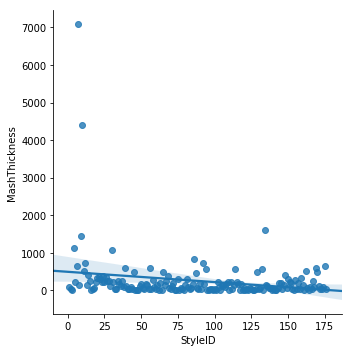

In [17]:
sns.lmplot(x = 'StyleID', y = 'MashThickness', data = beergroup)

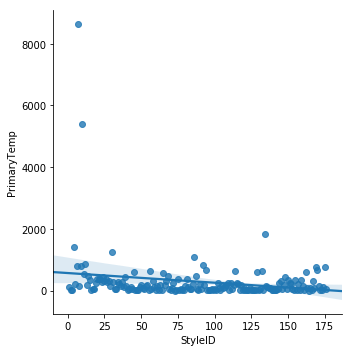

In [18]:
sns.lmplot(x = 'StyleID', y = 'PrimaryTemp', data = beergroup2)

The available values for both of these seem to pretty consistent across styles. These columns could be useful. Let's do a correlation matrix to see if we actually need MashThickness and PrimaryTemp.

In [38]:
beerdum = pd.get_dummies(beer)

In [39]:
beerdum.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PrimaryTemp,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
BeerID,,,,,,,,,,,,,,,,,,,
1,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,17.78,0,1,1,0,0,0
2,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,NaN,0,1,1,0,0,0
3,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,NaN,0,1,0,0,0,1
4,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,NaN,0,1,1,0,0,0
5,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,19.00,0,1,1,0,0,0


In [40]:
corrmat = beerdum.corr()
corrmat

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PrimaryTemp,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
StyleID,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002326,0.021515,0.006167,-0.019661,0.003359,-0.003359,0.013983,-0.002336,0.009732,-0.024206
Size(L),-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.176071,0.108826,0.019246,0.004278,0.165177,-0.165177,0.091072,-0.057732,-0.027144,-0.048682
OG,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.968138,0.067610,0.046841,0.000518,0.966978,-0.966978,0.074990,-0.042509,-0.023688,-0.044976
FG,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.908611,0.061173,0.040541,0.004477,0.879895,-0.879895,0.069044,-0.039570,-0.021441,-0.041160
ABV,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.025421,0.047853,-0.069633,0.060065,-0.011754,0.011754,0.023133,-0.030263,0.009125,-0.005076
IBU,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007498,-0.033172,-0.044381,0.035510,-0.014984,0.014984,0.002058,-0.005178,-0.004896,0.006195
Color,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013451,-0.017297,-0.038406,0.025622,-0.005038,0.005038,0.007478,-0.010460,0.021961,-0.013485
BoilSize,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175972,0.121971,0.017772,0.003000,0.167185,-0.167185,0.103762,-0.054453,-0.036589,-0.064718
BoilTime,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026921,0.161295,0.006850,-0.079809,0.027187,-0.027187,0.167420,-0.020255,-0.060951,-0.180843
BoilGravity,0.002326,0.176071,0.968138,0.908611,0.025421,-0.007498,0.013451,0.175972,0.026921,1.000000,0.059132,0.050944,0.002268,0.941791,-0.941791,0.067139,-0.047205,-0.015316,-0.033632


I don't need Sugarscale_Plato. It is binary and is strongly positively correlated with OG, FG and BoilGravity. I'll drop it. 

In [41]:
beerdum = beerdum.drop(columns = ['SugarScale_Plato'])

In [42]:
##OG is too strongly correlated with FG. I'll keep FG since it has a slightly stronger correlation with StyleID. 
## This makes sense since it is the final gravity of the beer. Boil Gravity, also highly correlated with FG,
##seems unimportant for the same reason.
beerdum = beerdum.drop(columns = ['OG','BoilGravity'])

In [43]:
##BoilSize and Size are too strongly correlated. I'll keeps Size since it correlates a tiny bit better with Style.
beerdum = beerdum.drop(columns = ['BoilSize'])

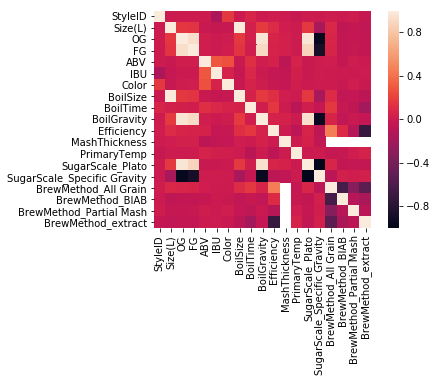

In [44]:
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

This heatmap looks pretty good. The strongest positive correlation is between Efficiency and BrewMethod_All Grain. Now I'd like to take a look at the distributions of MashThickness and PrimaryTemp to see if I can replace the nan values with the mean or median.

(0, 10)

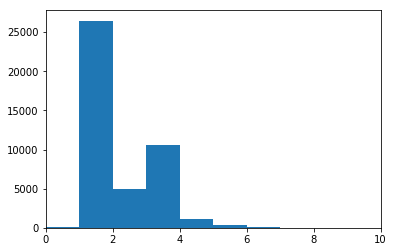

In [27]:
plt.hist(beerdum['MashThickness'].dropna(),bins = 100)
plt.xlim(0,10)

{'boxes': [<matplotlib.lines.Line2D at 0x10b094978>],
 'caps': [<matplotlib.lines.Line2D at 0x10b09b3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b0a4080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b09bc18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10b094ac8>,
  <matplotlib.lines.Line2D at 0x10b094f60>]}

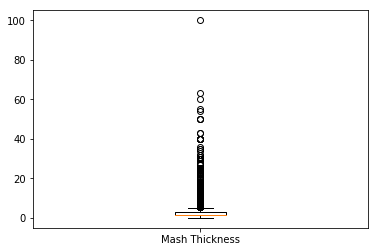

In [28]:
plt.boxplot(beerdum['MashThickness'].dropna(), labels = ['Mash Thickness'])

MashThickness has a lot of really high outliers and the distribution is not normal. It probably makes more sense to replace nan values with the median than the mean.

(0, 10)

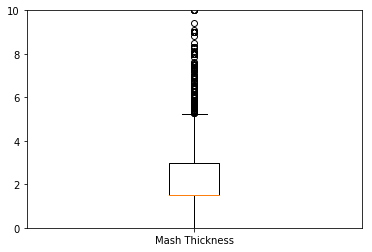

In [29]:
## Cut off outliers to better identify the median values.
plt.boxplot(beerdum['MashThickness'].dropna(), labels = ['Mash Thickness'])
plt.ylim(0,10)

In [30]:
np.median(beerdum['MashThickness'].dropna())

1.5

The median for MashThickness is 1.5.

In [31]:
beerdum['MashThickness2'] = beerdum['MashThickness'].fillna(1.5)

(0, 20)

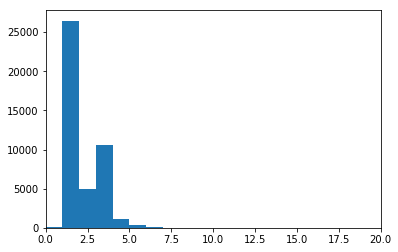

In [48]:
plt.hist(beerdum['MashThickness'].dropna(), bins = 100)
plt.xlim(0,20)

{'boxes': [<matplotlib.lines.Line2D at 0x10f52eac8>],
 'caps': [<matplotlib.lines.Line2D at 0x10e87c518>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e8861d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e87cd68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f52ec18>,
  <matplotlib.lines.Line2D at 0x10e87c0f0>]}

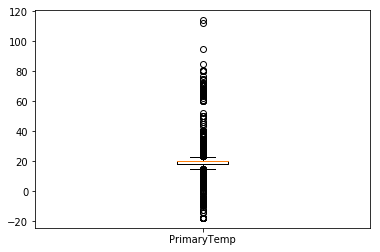

In [46]:
plt.boxplot(beerdum['PrimaryTemp'].dropna(), labels = ['PrimaryTemp'])

In [50]:
np.median(beerdum['PrimaryTemp'].dropna())

20.0

PrimaryTemp also has a lot of very high outliers. I'll replace nan values with the median.

In [51]:
beerdum['PrimaryTemp2'] = beerdum['PrimaryTemp'].fillna(20)

In [52]:
beerdum['MashThickness2'] = beerdum['MashThickness'].fillna(1.5)

In [53]:
beerna = beerdum.drop(columns = ['MashThickness','PrimaryTemp'])

In [54]:
beerna.head()

,StyleID,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract,PrimaryTemp2,MashThickness2
BeerID,,,,,,,,,,,,,,,
1,45,21.77,1.013,5.48,17.65,4.83,75,70.0,1,1,0,0,0,17.78,1.5
2,85,20.82,1.021,8.16,60.65,15.64,60,70.0,1,1,0,0,0,20.00,1.5
3,7,18.93,1.018,5.91,59.25,8.98,60,70.0,1,0,0,0,1,20.00,1.5
4,7,22.71,1.017,5.80,54.48,8.50,60,70.0,1,1,0,0,0,20.00,1.5
5,20,50.00,1.010,6.48,17.84,4.57,90,72.0,1,1,0,0,0,19.00,1.5
